In [5]:
%matplotlib inline

# Import used libraries
import numpy
import pandas
import matplotlib.pyplot as plt
from ebin import TitanicClassifier

                Survived      Pclass         Sex         Age       SibSp  \
Survived                                                                   
0        count       424  424.000000  424.000000  424.000000  424.000000   
         mean          0    2.485849    1.150943   30.626179    0.525943   
         std           0    0.743633    0.358417   14.172110    1.044760   
         min           0    1.000000    1.000000    1.000000    0.000000   
         25%           0    2.000000    1.000000   21.000000    0.000000   
         50%           0    3.000000    1.000000   28.000000    0.000000   
         75%           0    3.000000    1.000000   39.000000    1.000000   
         max           0    3.000000    2.000000   74.000000    5.000000   
1        count       290  290.000000  290.000000  290.000000  290.000000   
         mean          1    1.872414    1.679310   28.343690    0.493103   
         std           0    0.836617    0.467548   14.950952    0.731132   
         min

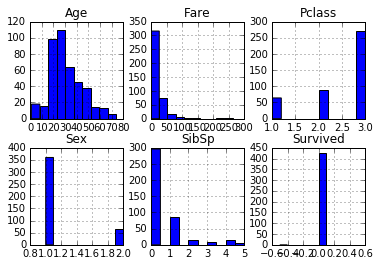

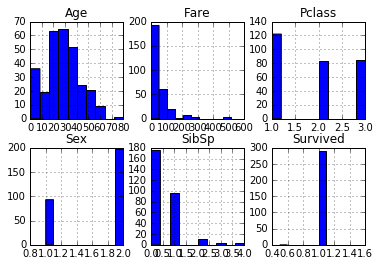

In [6]:
# Get descriptive stats
classifier = TitanicClassifier()
classifier.load_train_data()
classifier.descriptive_statistics()

In [7]:
# Train the classifier
classifier.train()

# load test data
testData = pandas.read_csv(
    "data/test.csv", header=None, usecols=[1, 3, 4, 5, 8])
testData = testData.replace(to_replace='male', value=1)
testData = testData.replace(to_replace='female', value=2)

# Slice the test data without column labels
testData = testData.values[1:100]
results = []
# Predict the scores
for example in testData:
    if len(example)==5:
        results.append(classifier.model.predict(example.reshape((1,5)))[0])

print results

(891, 1)
(891, 5)
Epoch 1/13
890/890 [==============================] - 0s - loss: 0.7501 - acc: 0.6124     
Epoch 2/13
890/890 [==============================] - 0s - loss: 0.6764 - acc: 0.6157     
Epoch 3/13
890/890 [==============================] - 0s - loss: 0.6703 - acc: 0.6157     
Epoch 4/13
890/890 [==============================] - 0s - loss: 0.6694 - acc: 0.6157     
Epoch 5/13
890/890 [==============================] - 0s - loss: 0.6678 - acc: 0.6157     
Epoch 6/13
890/890 [==============================] - 0s - loss: 0.6702 - acc: 0.6157     
Epoch 7/13
890/890 [==============================] - 0s - loss: 0.6691 - acc: 0.6157     
Epoch 8/13
890/890 [==============================] - 0s - loss: 0.6681 - acc: 0.6157     
Epoch 9/13
890/890 [==============================] - 0s - loss: 0.6676 - acc: 0.6157     
Epoch 10/13
890/890 [==============================] - 0s - loss: 0.6668 - acc: 0.6157     
Epoch 11/13
890/890 [==============================] - 0s - loss: 0.669